In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, t, beta
import pandas as pd
from statsmodels.stats.weightstats import ztest


np.random.seed(0)

# Frequentist Stats

In [2]:
mu = 170
sd = 7

In [3]:
x = norm.rvs(loc=mu, scale=sd, size=100)

In [4]:
x.var() # biased
x.var(ddof=1) # delta deg of freedom

50.278287213668314

In [9]:
norm.ppf(0.025, loc=mu, scale=sd)

156.28025210821963

In [7]:
norm.cdf(156, loc=mu, scale=sd)

0.022750131948179195

### Confidence Intervals

In [21]:
N = 1000
mu = 6
sigma = 3
X = np.random.randn(N)*sigma + mu

In [ ]:
mu_hat = np.mean(X)
sigma_hat = np.std(X, ddof=1)

z_left = norm.ppf(0.025)
z_right = norm.ppf(0.975)

lower = m

### Example

In [ ]:
import statistics

In [13]:
df = pd.read_csv('advertisement_clicks.csv')

#### 1 sample test

Testing: mean of advertisement A is lower than 0.4 (for alpha = 0.05)

In [157]:
action_a = df.loc[df['advertisement_id'] == 'A']['action']


In [192]:
population_mean = 0.35

sample_mean = action_a.mean()
sample_sd = action_a.std()

z = (sample_mean-population_mean)/(sample_sd/math.sqrt(action_a.count()))

print(f'sample mean: {sample_mean}')
print(f'sample sd: {sample_sd}')

# approximate with sample sd
print(f'Z-Score: {z}')
print(f'P-Score: {norm.cdf(z, loc=0, scale=1)}')

# alternately, use statsmodels library:
print('\nstatsmodels ztest:')
print(ztest(action_a, value = 0.35, alternative='smaller'))

sample mean: 0.304
sample sd: 0.4602127723084137
Z-Score: -3.160815629651007
P-Score: 0.0007866402404915502

statsmodels ztest:
(-3.160815629651007, 0.0007866402404915502)


P-score is less than alpha, and so we reject the null hypothesis

#### 2 sample test
Effectively a 1 sample test on a new dist (X1 - X2)/(X2 - X1)

In [181]:
action_a = df.loc[df['advertisement_id'] == 'A']['action']
action_b = df.loc[df['advertisement_id'] == 'B']['action']

In [187]:
mean_a = action_b.count()
mean_a

1000

In [201]:

# manually calculate
mean_a = action_a.mean()
mean_b = action_b.mean()

sd_a = action_a.std()
sd_b = action_b.std()

n_a = action_a.count()
n_b = action_b.count()

z = (mean_a-mean_b)/np.sqrt(((sd_a**2)/n_a) + ((sd_b**2)/n_b))

print(f'Z-Score: {z}')
print(f'P-Score: {norm.cdf(z, loc=0, scale=1)}')

# statsmodels
print(ztest(action_a, action_b))

Z-Score: -3.2211732138019786
P-Score: 0.0006383348150764772
(-3.2211732138019786, 0.0012766696301529544)


# Bayesian Statistics

# Algorithms

### Epsilon-Greedy
Will converge to true mean

### Optimistic Initial Values
Won't converge, will stop exploring bandits as soon as they go below max est mean 

Higher val, more estimation (hyperparam)

### UCB1
Think of this as taking the upper val of confidence interval, when uncertain -> high - balanced out with - when successful -> high

### Thomson Sampling
Bayesian, involves random sampling from posterior functions (which are updated sequentially)

In [126]:

class Bandit:
    def __init__(self, win_prob):
        
        self.est_win_prob = 0
        self.pulls = 0
        self.win_prob = win_prob
        
    def pull(self):
        return 0 if np.random.rand() >= self.win_prob else 1

    def update(self, x):
        self.pulls += 1
        self.est_win_prob = self.est_win_prob + (1/self.pulls)*(x - self.est_win_prob)



optimal_j: 3

run 0
exploit: bandit 0
bandit: 0, reward: 0, success_rate = 0.0
run 1
exploit: bandit 0
bandit: 0, reward: 0, success_rate = 0.0
run 2
exploit: bandit 0
bandit: 0, reward: 0, success_rate = 0.0
run 3
exploit: bandit 0
bandit: 0, reward: 0, success_rate = 0.0
run 4
exploit: bandit 0
bandit: 0, reward: 0, success_rate = 0.0
run 5
exploit: bandit 0
bandit: 0, reward: 0, success_rate = 0.0
run 6
exploit: bandit 0
bandit: 0, reward: 0, success_rate = 0.0
run 7
explore: bandit 0
bandit: 0, reward: 0, success_rate = 0.0
run 8
exploit: bandit 0
bandit: 0, reward: 0, success_rate = 0.0
run 9
exploit: bandit 0
bandit: 0, reward: 0, success_rate = 0.0
run 10
exploit: bandit 0
bandit: 0, reward: 0, success_rate = 0.0
run 11
exploit: bandit 0
bandit: 0, reward: 0, success_rate = 0.0
run 12
explore: bandit 0
bandit: 0, reward: 0, success_rate = 0.0
run 13
exploit: bandit 0
bandit: 0, reward: 0, success_rate = 0.0
run 14
exploit: bandit 0
bandit: 0, reward: 0, success_rate = 0.0
run 15

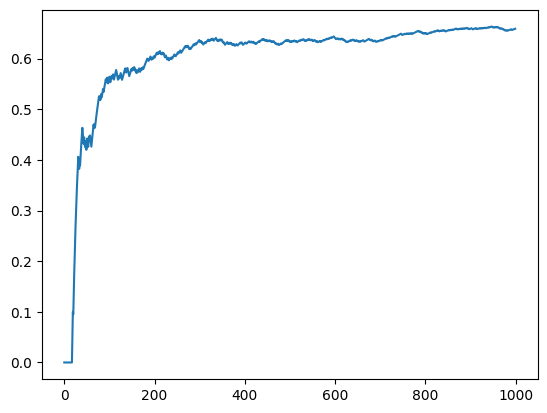

In [133]:
BANDIT_PROBS = [0.02, 0.3, 0.5, 0.7]
EPSILON = 0.1
NUM_TRIALS = 1000

def experiment():
    bandits = [Bandit(p) for p in BANDIT_PROBS]

    rewards = np.zeros(NUM_TRIALS)
    success_rate = np.zeros(NUM_TRIALS)
    num_times_explored = 0
    num_times_exploited = 0
    num_optimal = 0

    optimal_j = np.argmax([b.win_prob for b in bandits])
    print(f"optimal_j: {optimal_j}\n")

    for i in range(NUM_TRIALS):
        print(f'run {i}')
        if np.random.rand() < EPSILON:
            # choose random bandit
            j = np.random.randint(len(bandits))
            print(f'explore: bandit {j}')
            
        # choose efficient bandit
        else:
            j = np.argmax([b.est_win_prob for b in bandits])
            print(f"exploit: bandit {j}")

        x = bandits[j].pull()
        rewards[i] = x
        success_rate[i] = rewards.sum()/(i+1)
        
        print(f'bandit: {j}, reward: {x}, success_rate = {success_rate[i]}')
        bandits[j].update(x)
        
    plt.plot(success_rate)
experiment()
    

In [44]:
np.argmax([1, 2, 3, 5])

3

In [54]:

bandits = [1,2,3]
np.random.randint(len(bandits))

1

In [114]:
b = Bandit(0.1)

In [115]:
for x in range(100):
    x = b.pull()
    b.update(x)
    
    print(b.win_prob, b.est_win_prob)

0.1 0.0
0.1 0.0
0.1 0.0
0.1 0.0
0.1 0.0
0.1 0.0
0.1 0.0
0.1 0.0
0.1 0.0
0.1 0.0
0.1 0.0
0.1 0.0
0.1 0.0
0.1 0.07142857142857142
0.1 0.13333333333333333
0.1 0.125
0.1 0.11764705882352941
0.1 0.1111111111111111
0.1 0.10526315789473684
0.1 0.15
0.1 0.14285714285714285
0.1 0.13636363636363635
0.1 0.13043478260869565
0.1 0.125
0.1 0.12
0.1 0.15384615384615385
0.1 0.14814814814814817
0.1 0.14285714285714288
0.1 0.13793103448275865
0.1 0.13333333333333336
0.1 0.12903225806451615
0.1 0.12500000000000003
0.1 0.12121212121212124
0.1 0.11764705882352944
0.1 0.11428571428571431
0.1 0.11111111111111113
0.1 0.10810810810810813
0.1 0.10526315789473686
0.1 0.10256410256410259
0.1 0.10000000000000002
0.1 0.09756097560975611
0.1 0.09523809523809526
0.1 0.09302325581395351
0.1 0.09090909090909094
0.1 0.08888888888888892
0.1 0.08695652173913046
0.1 0.08510638297872343
0.1 0.08333333333333336
0.1 0.08163265306122451
0.1 0.08000000000000002
0.1 0.07843137254901962
0.1 0.07692307692307694
0.1 0.0754716981132

### Optimistic Initial Value

In [183]:

class Bandit:
    def __init__(self, win_prob):
        
        self.est_win_prob = 10 # can be > 1
        self.pulls = 1 # must be set to 1, otherwise initial win_prob is 'wiped'
        self.win_prob = win_prob
        
    def pull(self):
        return 0 if np.random.rand() >= self.win_prob else 1

    def update(self, x):
        self.pulls += 1
        self.est_win_prob = self.est_win_prob + (1/self.pulls)*(x - self.est_win_prob)



optimal_j: 3

run 0
bandit: 0, reward: 0, success_rate = 0.0
run 1
bandit: 1, reward: 0, success_rate = 0.0
run 2
bandit: 2, reward: 0, success_rate = 0.0
run 3
bandit: 3, reward: 1, success_rate = 0.25
run 4
bandit: 3, reward: 1, success_rate = 0.4
run 5
bandit: 0, reward: 0, success_rate = 0.3333333333333333
run 6
bandit: 1, reward: 0, success_rate = 0.2857142857142857
run 7
bandit: 2, reward: 1, success_rate = 0.375
run 8
bandit: 3, reward: 1, success_rate = 0.4444444444444444
run 9
bandit: 2, reward: 1, success_rate = 0.5
run 10
bandit: 0, reward: 0, success_rate = 0.45454545454545453
run 11
bandit: 1, reward: 0, success_rate = 0.4166666666666667
run 12
bandit: 3, reward: 0, success_rate = 0.38461538461538464
run 13
bandit: 2, reward: 0, success_rate = 0.35714285714285715
run 14
bandit: 3, reward: 1, success_rate = 0.4
run 15
bandit: 0, reward: 0, success_rate = 0.375
run 16
bandit: 1, reward: 0, success_rate = 0.35294117647058826
run 17
bandit: 2, reward: 0, success_rate = 0.33333

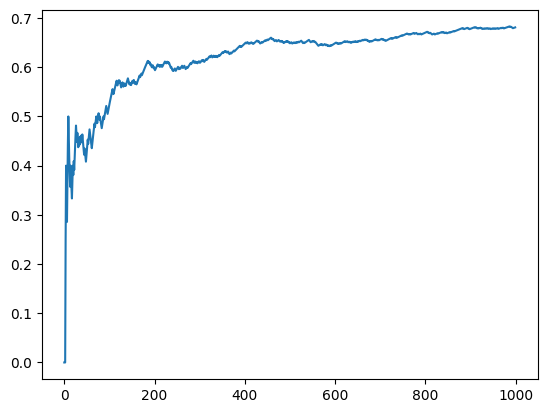

In [184]:
BANDIT_PROBS = [0.02, 0.3, 0.5, 0.7]
NUM_TRIALS = 1000

def experiment():
    bandits = [Bandit(p) for p in BANDIT_PROBS]

    rewards = np.zeros(NUM_TRIALS)
    success_rate = np.zeros(NUM_TRIALS)
    num_times_explored = 0
    num_times_exploited = 0
    num_optimal = 0

    optimal_j = np.argmax([b.win_prob for b in bandits])
    print(f"optimal_j: {optimal_j}\n")

    for i in range(NUM_TRIALS):
        print(f'run {i}')
        j = np.argmax([b.est_win_prob for b in bandits])
        
        x = bandits[j].pull()
        rewards[i] = x
        success_rate[i] = rewards.sum()/(i+1)
        
        print(f'bandit: {j}, reward: {x}, success_rate = {success_rate[i]}')
        bandits[j].update(x)
        
    plt.plot(success_rate)
experiment()
    

### UCB1
When initializing, to avoid log(0)/0 term, play each bandit once

In [188]:

class Bandit:
    def __init__(self, win_prob):
        
        self.est_win_prob = 0
        self.pulls = 0
        self.win_prob = win_prob
        
    def pull(self):
        return 0 if np.random.rand() >= self.win_prob else 1

    def update(self, x):
        self.pulls += 1
        self.est_win_prob = self.est_win_prob + (1/self.pulls)*(x - self.est_win_prob)



optimal_j: 3

run 0
bandit: 0, reward: 0, success_rate = 0.0
run 1
bandit: 1, reward: 0, success_rate = 0.0
run 2
bandit: 2, reward: 0, success_rate = 0.0
run 3
bandit: 3, reward: 1, success_rate = 0.25
run 4
bandit: 3, reward: 1, success_rate = 0.4
run 5
bandit: 3, reward: 1, success_rate = 0.5
run 6
bandit: 3, reward: 1, success_rate = 0.5714285714285714
run 7
bandit: 3, reward: 1, success_rate = 0.625
run 8
bandit: 0, reward: 0, success_rate = 0.5555555555555556
run 9
bandit: 1, reward: 0, success_rate = 0.5
run 10
bandit: 2, reward: 1, success_rate = 0.5454545454545454
run 11
bandit: 2, reward: 1, success_rate = 0.5833333333333334
run 12
bandit: 3, reward: 1, success_rate = 0.6153846153846154
run 13
bandit: 2, reward: 0, success_rate = 0.5714285714285714
run 14
bandit: 3, reward: 0, success_rate = 0.5333333333333333
run 15
bandit: 3, reward: 1, success_rate = 0.5625
run 16
bandit: 3, reward: 0, success_rate = 0.5294117647058824
run 17
bandit: 2, reward: 0, success_rate = 0.5
run 18

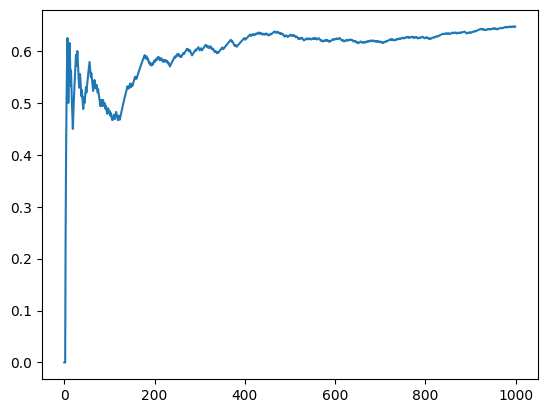

In [192]:
BANDIT_PROBS = [0.02, 0.3, 0.5, 0.7]
NUM_TRIALS = 1000

def experiment():
    bandits = [Bandit(p) for p in BANDIT_PROBS]

    rewards = np.zeros(NUM_TRIALS)
    success_rate = np.zeros(NUM_TRIALS)
    num_times_explored = 0
    num_times_exploited = 0
    num_optimal = 0

    optimal_j = np.argmax([b.win_prob for b in bandits])
    print(f"optimal_j: {optimal_j}\n")

    start_offset = len(bandits)
    # play one bandit each to initialize
    for i, bandit in enumerate(bandits):
        print(f'run {i}')
        x = bandit.pull()
        rewards[i] = x
        success_rate[i] = rewards.sum()/(i+1)
        
        print(f'bandit: {i}, reward: {x}, success_rate = {success_rate[i]}')
        bandit.update(x)

    
    for i in range(NUM_TRIALS - start_offset):
        i += start_offset
        print(f'run {i}')
        j = np.argmax([b.est_win_prob + np.sqrt(2*(np.log(i)/b.pulls)) for b in bandits]) # use ucb func to find j for current step
        x = bandits[j].pull()
        rewards[i] = x
        success_rate[i] = rewards.sum()/(i+1)
        
        print(f'bandit: {j}, reward: {x}, success_rate = {success_rate[i]}')
        bandits[j].update(x)
        
    plt.plot(success_rate)
    print()
    print(f'bandits played: {[b.pulls for b in bandits]}')
    print(f'est win probs: {[b.est_win_prob for b in bandits]}')
experiment()
    

### Thomson Sampling

In [213]:

class Bandit:
    def __init__(self, win_prob):
        
        self.est_win_prob = 0
        self.a = 1 # beta
        self.b = 1 # beta
        
        self.pulls = 0
        self.win_prob = win_prob

        
    def pull(self):
        return 0 if np.random.rand() >= self.win_prob else 1

    def update(self, x):
        self.pulls += 1
        self.est_win_prob = self.est_win_prob + (1/self.pulls)*(x - self.est_win_prob)

        self.a += x
        self.b += (1-x)



optimal_j: 3

run 0
bandit: 2, reward: 1, success_rate = 1.0
run 1
bandit: 2, reward: 1, success_rate = 1.0
run 2
bandit: 2, reward: 0, success_rate = 0.6666666666666666
run 3
bandit: 1, reward: 0, success_rate = 0.5
run 4
bandit: 1, reward: 0, success_rate = 0.4
run 5
bandit: 3, reward: 0, success_rate = 0.3333333333333333
run 6
bandit: 1, reward: 1, success_rate = 0.42857142857142855
run 7
bandit: 2, reward: 1, success_rate = 0.5
run 8
bandit: 2, reward: 1, success_rate = 0.5555555555555556
run 9
bandit: 0, reward: 0, success_rate = 0.5
run 10
bandit: 2, reward: 0, success_rate = 0.45454545454545453
run 11
bandit: 0, reward: 0, success_rate = 0.4166666666666667
run 12
bandit: 2, reward: 1, success_rate = 0.46153846153846156
run 13
bandit: 2, reward: 1, success_rate = 0.5
run 14
bandit: 0, reward: 0, success_rate = 0.4666666666666667
run 15
bandit: 3, reward: 0, success_rate = 0.4375
run 16
bandit: 2, reward: 1, success_rate = 0.47058823529411764
run 17
bandit: 2, reward: 0, success_r

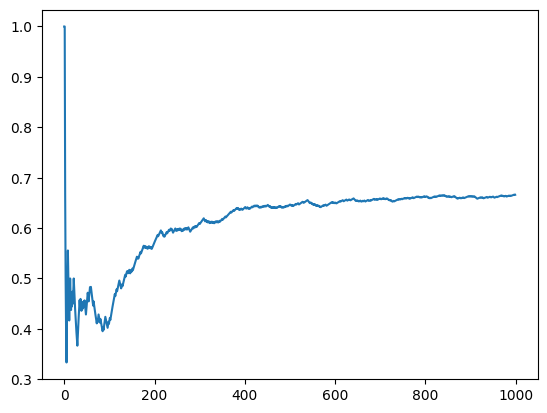

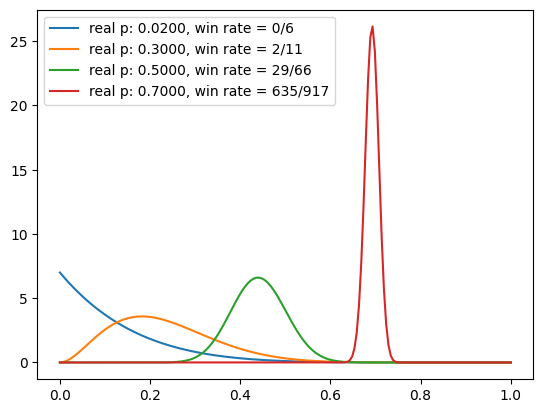

In [227]:
BANDIT_PROBS = [0.02, 0.3, 0.5, 0.7]
NUM_TRIALS = 1000

def experiment():
    bandits = [Bandit(p) for p in BANDIT_PROBS]

    rewards = np.zeros(NUM_TRIALS)
    success_rate = np.zeros(NUM_TRIALS)
    num_times_explored = 0
    num_times_exploited = 0
    num_optimal = 0

    optimal_j = np.argmax([b.win_prob for b in bandits])
    print(f"optimal_j: {optimal_j}\n")

    for i in range(NUM_TRIALS):
        print(f'run {i}')

        j = np.argmax([np.random.beta(b.a, b.b) for b in bandits])

        x = bandits[j].pull()
        rewards[i] = x
        success_rate[i] = rewards.sum()/(i+1)
        
        print(f'bandit: {j}, reward: {x}, success_rate = {success_rate[i]}')
        bandits[j].update(x)
        
    plt.plot(success_rate)

    plt.figure()
    x = np.linspace(0,1,200)
    for b in bandits:
        y = beta.pdf(x, b.a, b.b)
        plt.plot(x, y, label = f"real p: {b.win_prob:.4f}, win rate = {b.a - 1}/{b.pulls}")

    plt.legend()
experiment()
    

### Real-Valued Reward Function

In [248]:
np.random.normal(0,1)

0.5376543024660478

In [290]:

class Bandit:
    def __init__(self, mu):

        # 'True' params (use these when getting reward)
        self.mu = mu
        self.tau = 1

        # Param looking for (use this to sample and so select which bandit)
        self.est_mu = 0
        # self.est_tau = 1 (fixed in this)

        # posterior dist
        # self.m = 0
        self.l = 1

        self.pulls = 0
        self.sum_x = 0

    
    def pull(self):
        return np.random.normal(self.mu,1/self.tau)

    def update(self, x):
        

        # self.m = (1/(self.tau*self.pulls + self.l)*(self.tau*x + self.l*self.m))
        self.l += self.tau # .est_win_prob = self.est_win_prob + (1/self.pulls)*(x - self.est_win_prob)
        self.sum_x += x

        self.est_mu = self.tau*self.sum_x / self.l # np.random.normal(self.m, 1/self.l)

        self.pulls += 1


optimal_j: 2

run 0
bandit: 0, reward: 0.21742580396915923, average_return = 0.21742580396915923
run 1
bandit: 2, reward: 2.0463345273629585, average_return = 1.1318801656660589
run 2
bandit: 2, reward: 1.6051022069858452, average_return = 1.2896208461059875
run 3
bandit: 2, reward: 3.3837207633318247, average_return = 1.8131458254124468
run 4
bandit: 2, reward: 2.583942604531213, average_return = 1.9673051812362001
run 5
bandit: 2, reward: 1.6994776670230303, average_return = 1.9226672622006717
run 6
bandit: 1, reward: 0.6983516495420614, average_return = 1.7477650318208704
run 7
bandit: 2, reward: 3.297173935367206, average_return = 1.9414411447641624
run 8
bandit: 2, reward: 0.7789478733074304, average_return = 1.8122752257134147
run 9
bandit: 2, reward: 2.1808497225242425, average_return = 1.8491326753944972
run 10
bandit: 2, reward: 3.498336267979462, average_return = 1.9990602747204032
run 11
bandit: 2, reward: 2.6479627560155223, average_return = 2.0531354814949965
run 12
bandit

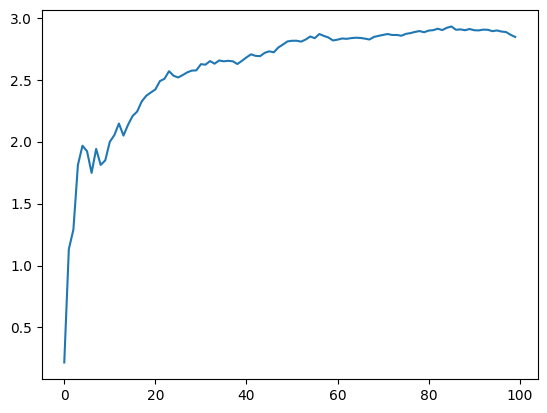

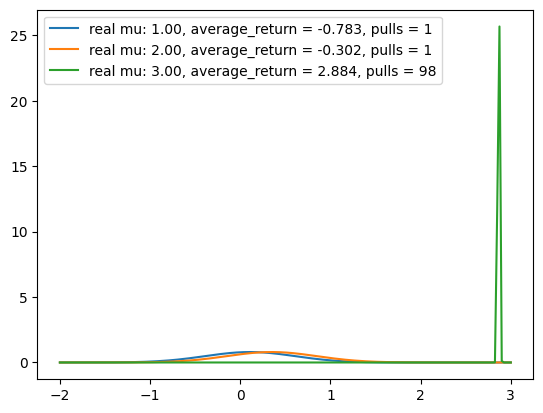

In [291]:
BANDIT_MUS = [1, 2, 3]
NUM_TRIALS = 100

def experiment():
    bandits = [Bandit(mu) for mu in BANDIT_MUS]

    rewards = np.zeros(NUM_TRIALS)
    average_return = np.zeros(NUM_TRIALS)
    num_times_explored = 0
    num_times_exploited = 0
    num_optimal = 0

    optimal_j = np.argmax([b.mu for b in bandits])
    print(f"optimal_j: {optimal_j}\n")

    for i in range(NUM_TRIALS):
        print(f'run {i}')

        j = np.argmax([np.random.normal(b.est_mu, 1/b.l) for b in bandits])

        x = bandits[j].pull()
        rewards[i] = x
        average_return[i] = rewards.sum()/(i+1)
        
        print(f'bandit: {j}, reward: {x}, average_return = {average_return[i]}')
        bandits[j].update(x)
        
    plt.plot(average_return)

    plt.figure()
    x = np.linspace(-2,3,200)
    for b in bandits:
        y = norm.pdf(x, b.est_mu, 1/b.l)
        plt.plot(x, y, label = f"real mu: {b.mu:.2f}, average_return = {(b.sum_x - 1)/b.pulls:.3f}, pulls = {b.pulls}")

    plt.legend()
experiment()
    